<a href="https://colab.research.google.com/github/arnml/colabrepository/blob/main/MITx_6_419x_module1_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1.2

In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/mitx/module1_data/gamma-ray.csv')
df.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,seconds,count
count,100.000000,100.000000
mean,157.182000,0.610000
std,251.579574,1.246368
min,12.500000,0.000000
25%,52.250000,0.000000
50%,100.350000,0.000000
75%,110.250000,1.000000
max,1350.000000,7.000000


In [ ]:
lambda_null = df['count'].mean() / df['seconds'].mean()
lambda_null

0.003880851496990749

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
df_chi2 = 99
critical_value = chi2.ppf(0.95, df_chi2)
print("Critical value:", critical_value)

Critical value: 123.2252214533618


In [ ]:
from scipy.stats import poisson
statistic_num = np.prod(poisson.pmf(df['count'], lambda_null * df['seconds']))
statistic_den = np.prod(poisson.pmf(df['count'], df['count']))
statistic = -2*np.log(statistic_num / statistic_den)
p_value = chi2.sf(statistic, df_chi2)
print('statistic:', statistic)
print('p_value:', p_value)

statistic: 104.39792133021314
p_value: 0.33576662402509894


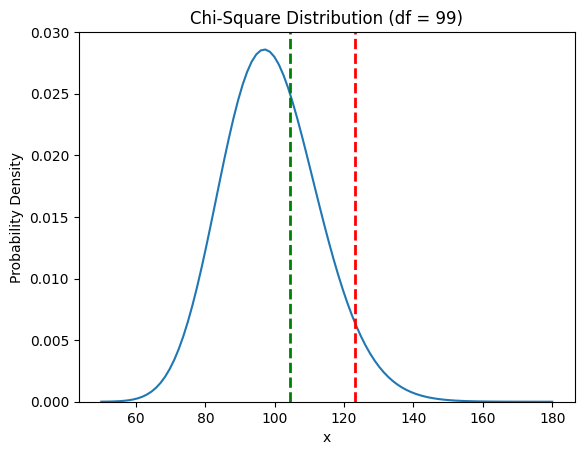

In [ ]:
x = np.linspace(50, 180, 100)
y = chi2.pdf(x, df_chi2)

plt.plot(x, y)
plt.axvline(critical_value, color='red', linestyle='dashed', linewidth=2)
plt.axvline(statistic, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.ylim(0, 0.03)
plt.title('Chi-Square Distribution (df = {})'.format(df_chi2))
plt.show()


# Problema 1.4

In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
def openData(path):
   data = np.genfromtxt(path, delimiter=',', skip_header=1)[:, 1:]
   np_arrays = np.array([np.array(row) for row in data])
   return np_arrays
golub_data = openData('/content/drive/MyDrive/mitx/module1_data/golub.csv')
golub_classnames = openData('/content/drive/MyDrive/mitx/module1_data/golub_cl.csv')

In [ ]:
N_ALL = len(golub_classnames[golub_classnames == 0])
N_AML = len(golub_classnames[golub_classnames == 1])
x_ALL = golub_data[:,golub_classnames[:,0] == 0]
x_AML = golub_data[:,golub_classnames[:,0] == 1]
mean_x_ALL = np.mean(x_ALL, axis=1)
variance_x_ALL = np.var(x_ALL, axis=1, ddof=1)
mean_x_AML = np.mean(x_AML, axis=1)
variance_x_AML = np.var(x_AML, axis=1, ddof=1)

In [ ]:
# statistics
t_Welch = (mean_x_ALL - mean_x_AML) / np.sqrt((variance_x_ALL / len(x_ALL[0])) + (variance_x_AML / len(x_AML[0])))

In [ ]:
# t-distribution order
v = (variance_x_ALL / N_ALL + variance_x_AML / N_AML) ** 2 / ((variance_x_ALL / N_ALL) ** 2 / (N_ALL - 1) + (variance_x_AML / N_AML) ** 2 / (N_AML - 1))

In [ ]:
from scipy.stats import t
alpha = 0.05
p_values = t.sf(np.abs(t_Welch), df = v)
sorted_p_values = np.sort(p_values)
m = len(sorted_p_values)

In [ ]:
# uncorrected experiments
np.sum(sorted_p_values < alpha / 2)

1078

In [ ]:
# Holm-Bonferroni correction
holm_bonferroni_values = sorted_p_values * np.arange(m, 0, -1)
holm_bonferroni_rejected_number = np.sum(holm_bonferroni_values < alpha / 2)
holm_bonferroni_rejected_number

103

In [ ]:
# Benjamini-Hochberg correction
benjamini_hochberg_values = sorted_p_values * m /np.arange(1, m + 1)
max_index = np.max(np.where(benjamini_hochberg_values < alpha / 2))
benjamini_hochberg_rejected_number = max_index + 1
benjamini_hochberg_rejected_number

695

# Problema 1.6 - part 1

In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
x_file_path = '/content/drive/MyDrive/mitx/module1_data/syn_X.csv'
y_file_path = '/content/drive/MyDrive/mitx/module1_data/syn_y.csv'
x_data = np.genfromtxt(x_file_path, delimiter=',', skip_header=0)
X = np.concatenate((np.ones_like(x_data[:,:1]), x_data), axis=1)
y = np.genfromtxt(y_file_path, delimiter=',', skip_header=0)

In [ ]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta

array([ 1.92960603,  1.26397096, -4.59799331])

In [ ]:
def compute_loss(X, y, beta):
    """ Compute the loss function (Mean Squared Error). """
    residuals = y - X @ beta
    return (residuals.T @ residuals)

def gradient_descent(X, y, step_size=0.01, precision=1e-6, max_iters=1000):
    """ Perform gradient descent to minimize the loss function. """
    m, n = X.shape
    beta = np.zeros(n)  # Initialize beta coefficients
    losses = []  # Store loss values for visualization
    prev_loss = float('inf')

    for i in range(max_iters):
        gradient = -2 * X.T @ (y - X @ beta)  # Compute gradient
        beta -= step_size * gradient  # Update beta

        loss = compute_loss(X, y, beta)
        losses.append(loss)

        # Check for convergence
        if abs(prev_loss - loss) < precision:
            break
        prev_loss = loss

    return beta, losses

optimal beta [ 1.92960131  1.26395422 -4.59799576]


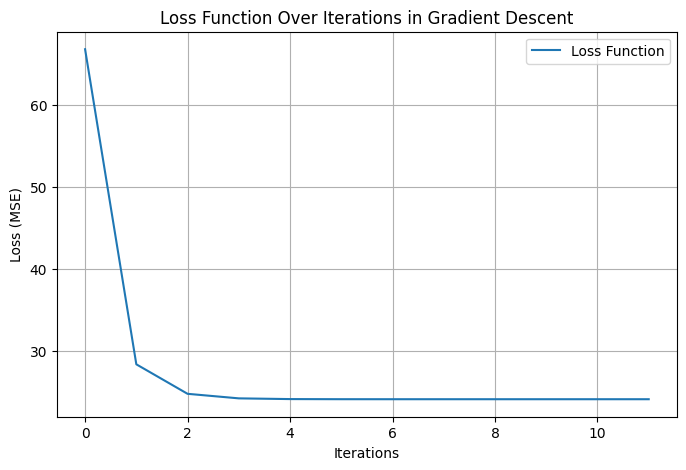

In [ ]:
# Run gradient descent
import matplotlib.pyplot as plt

step_size = 0.005
precision = 1e-6
optimal_beta, loss_values = gradient_descent(X, y, step_size, precision)
print("optimal beta", optimal_beta)
# Plot the loss function over iterations
plt.figure(figsize=(8, 5))
plt.plot(loss_values, label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Over Iterations in Gradient Descent")
plt.legend()
plt.grid()
plt.show()

optimal step 0.004244444444444444


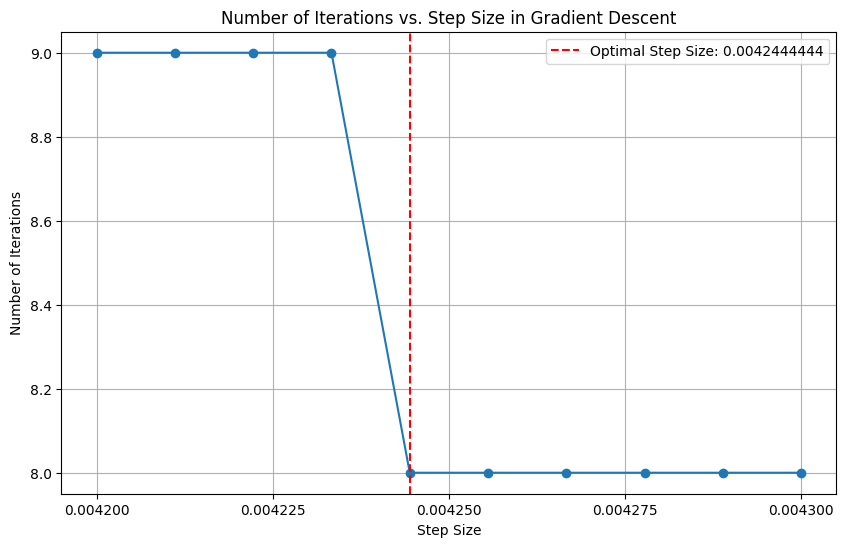

In [ ]:
min_steps = 0.0042
max_steps = 0.0043
number_tries = 10
step_sizes = np.linspace(min_steps, max_steps, number_tries) # Create an array of step sizes from 0.3 to 0.6 with a step of 0.01
loss_lengths = []

for step_size in step_sizes:
    optimal_beta, loss_values = gradient_descent(X, y, step_size=step_size, precision=1e-6)
    loss_lengths.append(len(loss_values))
optimal_step = step_sizes[loss_lengths.index(min(loss_lengths))]
print("optimal step", optimal_step)
plt.figure(figsize=(10, 6))
plt.plot(step_sizes, loss_lengths, marker='o', linestyle='-')
plt.xlabel("Step Size")
plt.ylabel("Number of Iterations")
plt.axvline(x=optimal_step, color='red', linestyle='--', label=f'Optimal Step Size: {optimal_step:.10f}')
plt.legend()
plt.xticks(np.linspace(min_steps, max_steps, 5))
plt.title("Number of Iterations vs. Step Size in Gradient Descent")
plt.grid(True)
plt.show()

# Problema 1.6 - parte 2

In [ ]:
%reset -f
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import io
import csv
import numpy as np

file_path = '/content/drive/MyDrive/mitx/module1_data/mortality.csv'

fields, cities, values = None, [], []
with open(file_path, 'r') as file:  # Open the file directly
    csv_reader = csv.reader(file, delimiter=',', quotechar='"')
    fields = next(csv_reader)[1:]  # Get header row (fields)
    for row in csv_reader:
        cities.append(row[0])
        values.append(tuple(map(float, row[1:])))  # Convert data to floats

# Convert to NumPy arrays for easier analysis
cities = np.array(cities)
values = np.array(values)

In [ ]:
# trying to get convergence
X = values[:,1:]
y = values[:,0]

In [ ]:
def compute_loss(X, y, beta):
    """ Compute the loss function (Mean Squared Error). """
    residuals = y - X @ beta
    return (residuals.T @ residuals)

def gradient_descent(X, y, step_size=0.01, precision=1e-6, max_iters=1000):
    """ Perform gradient descent to minimize the loss function. """
    m, n = X.shape
    beta = np.zeros(n)  # Initialize beta coefficients
    losses = []  # Store loss values for visualization
    prev_loss = float('inf')

    for i in range(max_iters):
        gradient = -2 * X.T @ (y - X @ beta)  # Compute gradient
        beta -= step_size * gradient  # Update beta

        loss = compute_loss(X, y, beta)
        losses.append(loss)

        # Check for convergence
        if abs(prev_loss - loss) < precision:
            break
        prev_loss = loss

    return beta, losses

<ipython-input-487-dd27794103ff>:4: RuntimeWarning: overflow encountered in matmul
  return (residuals.T @ residuals)
<ipython-input-487-dd27794103ff>:21: RuntimeWarning: invalid value encountered in scalar subtract
  if abs(prev_loss - loss) < precision:
<ipython-input-487-dd27794103ff>:14: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * X.T @ (y - X @ beta)  # Compute gradient
<ipython-input-487-dd27794103ff>:15: RuntimeWarning: invalid value encountered in subtract
  beta -= step_size * gradient  # Update beta


optimal beta [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]


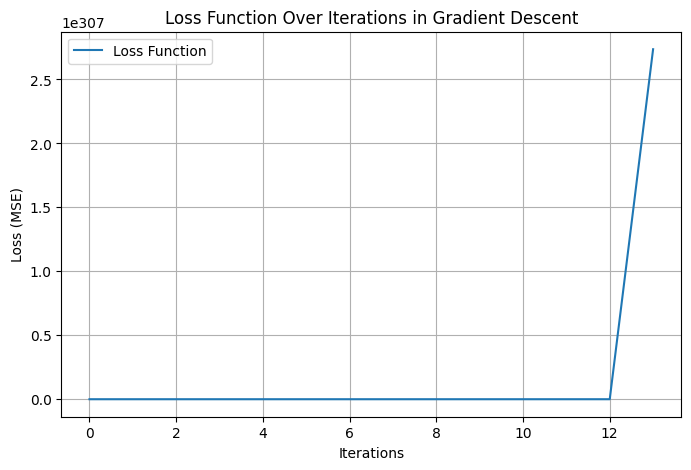

In [ ]:
import matplotlib.pyplot as plt

step_size = 0.0001
precision = 1e-6
optimal_beta, loss_values = gradient_descent(X, y, step_size, precision)
print("optimal beta", optimal_beta)
# Plot the loss function over iterations
plt.figure(figsize=(8, 5))
plt.plot(loss_values, label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Over Iterations in Gradient Descent")
plt.legend()
plt.grid()
plt.show()

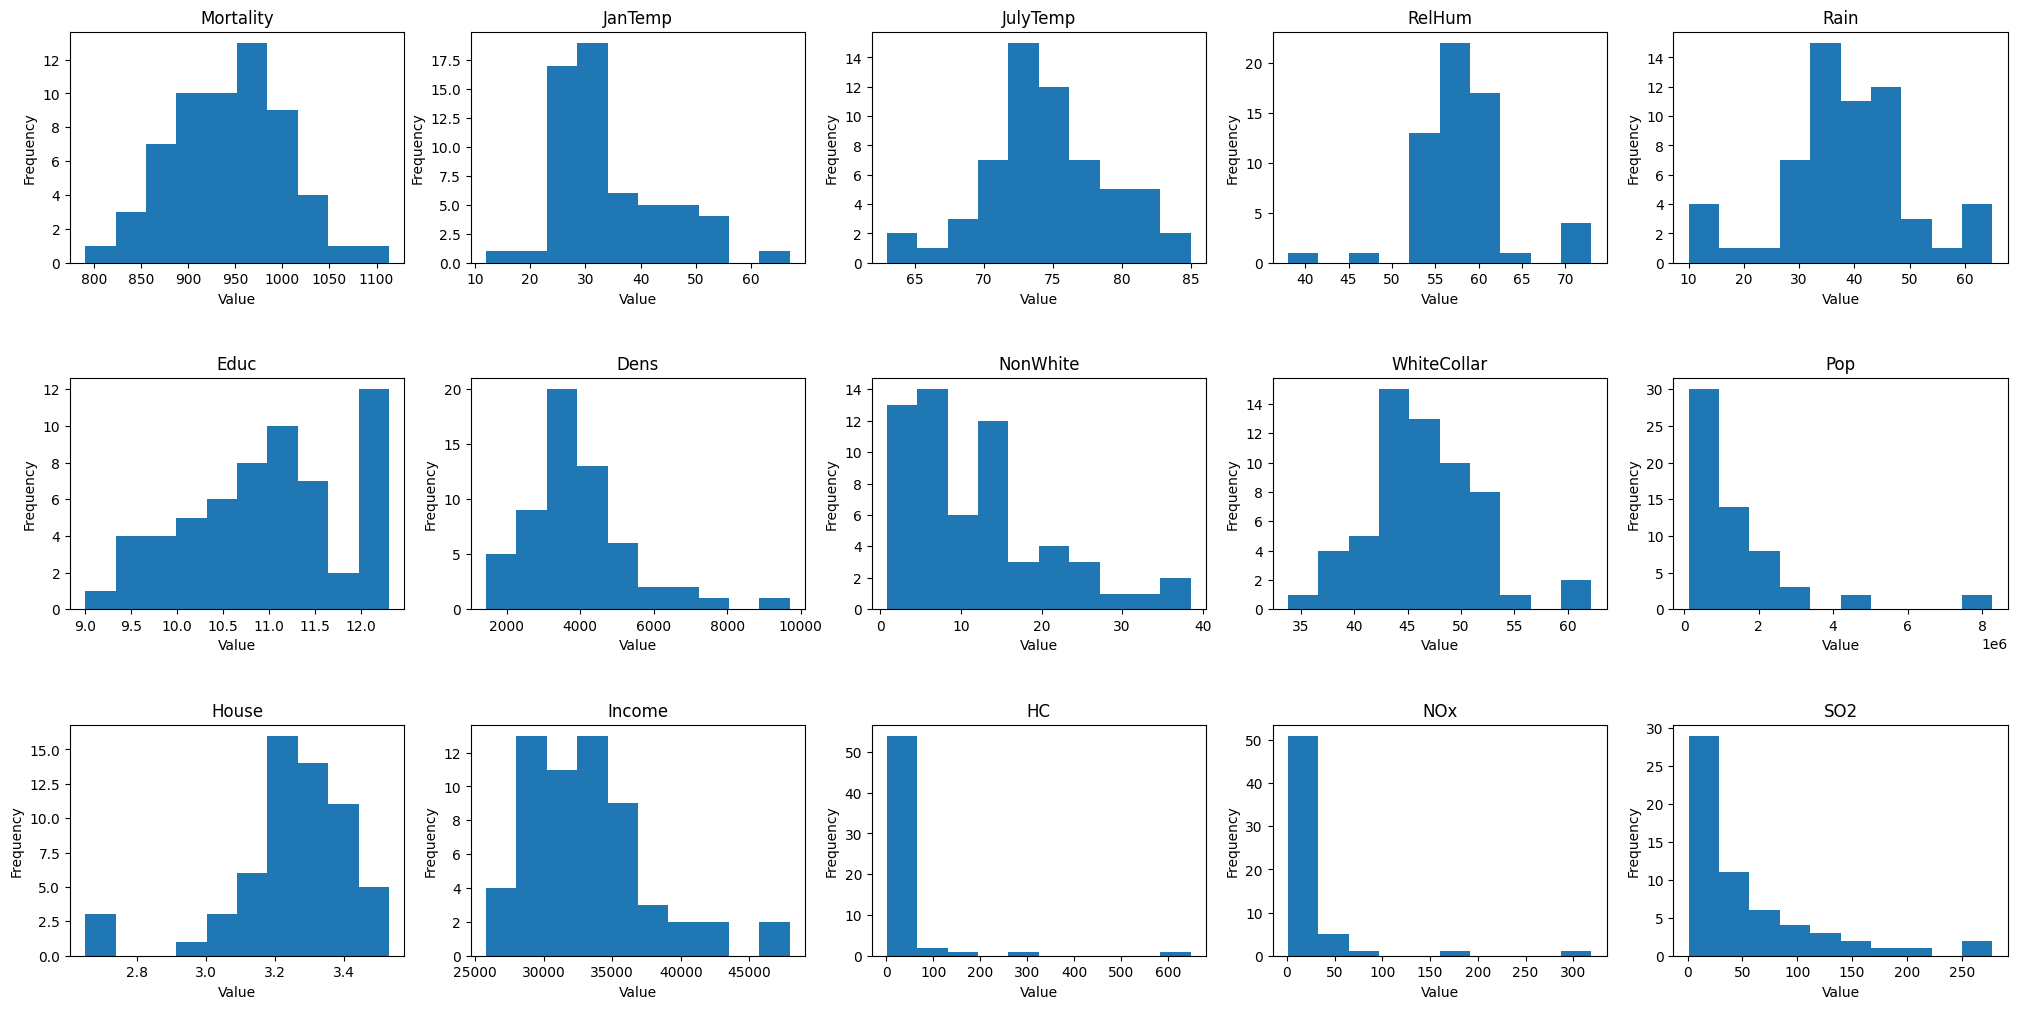

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'fields' and 'values' are defined from the previous code
# Create the histograms
num_fields = len(fields)
num_cols = 5  # Number of columns in the plot
num_rows = (num_fields + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 4* num_rows))
fig.subplots_adjust(hspace=0.5)

for i, field in enumerate(fields):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    ax.hist(values[:, i], bins=10)  # Adjust bins as needed
    ax.set_title(field)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")


# Hide any unused subplots if the number of fields isn't a multiple of num_cols
for i in range(num_fields, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    if num_rows > 1:
      axes[row_idx, col_idx].set_visible(False)
    else:
      axes[col_idx].set_visible(False)


plt.show()

In [ ]:
# Transform data
X_scaled = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_scaled = np.concatenate((np.ones_like(X[:,:1]), X_scaled), axis=1)
y_scaled = (y - np.mean(y)) / np.std(y, ddof=1)

In [ ]:
optimal_beta = np.linalg.inv(X_scaled.T @ X_scaled) @ X_scaled.T @ y_scaled
optimal_beta

array([-1.42247325e-16, -2.34377091e-01, -2.17496828e-01,  1.17238925e-02,
        1.79754504e-01, -1.50544513e-01,  1.08945825e-01,  7.64348559e-01,
       -1.21202349e-01,  8.40325965e-02, -1.11479218e-01, -3.04687337e-02,
       -9.96190618e-01,  8.81043305e-01,  8.61146149e-02])

optimal beta by GD: [-1.73305814e-16 -2.34599400e-01 -2.17382756e-01  1.16168257e-02
  1.80786476e-01 -1.50234043e-01  1.08883331e-01  7.64550800e-01
 -1.21675739e-01  8.37045865e-02 -1.11142381e-01 -3.02814063e-02
 -9.73181526e-01  8.57772893e-01  8.94341291e-02]


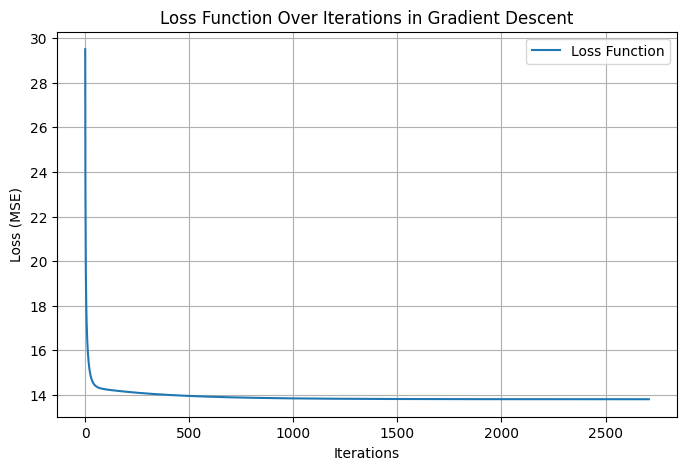

In [ ]:
step_size = 0.002
precision = 1e-6
max_steps = 4000
optimal_beta_2, loss_values = gradient_descent(X_scaled, y_scaled, step_size, precision, max_steps)
print("optimal beta by GD:", optimal_beta_2)
# Plot the loss function over iterations
plt.figure(figsize=(8, 5))
plt.plot(loss_values, label="Loss Function")
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Function Over Iterations in Gradient Descent")
plt.legend()
plt.grid()
plt.show()

In [ ]:
residuals = y_scaled - X_scaled @ optimal_beta

In [ ]:
from sklearn.metrics import r2_score
r2_original = r2_score(y_scaled, X_scaled @ optimal_beta)
print("R-squared:", r2_original)

R-squared: 0.7619093243817184


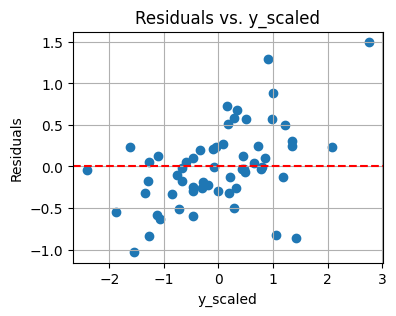

In [ ]:
plt.figure(figsize=(4, 3))
plt.scatter(y_scaled, residuals)
plt.xlabel("y_scaled")
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Residuals")
plt.title("Residuals vs. y_scaled")
plt.grid(True)
plt.show()

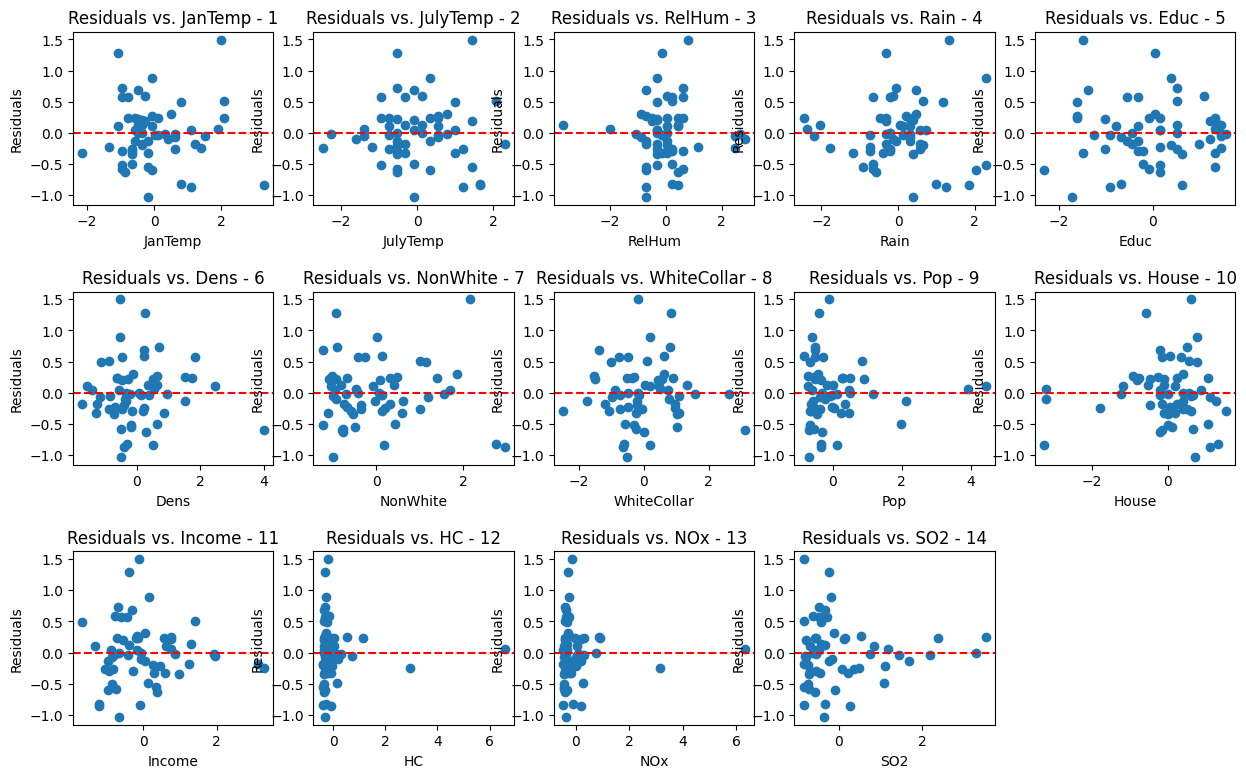

In [ ]:
num_cols = 5  # Number of columns in the plot
num_rows = (X_scaled.shape[1] + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i in range(1, X_scaled.shape[1]):
    row_idx = (i - 1) // num_cols
    col_idx = (i - 1) % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]

    ax.scatter(X_scaled[:, i], residuals)
    ax.axhline(y=0, color='r', linestyle='--')
    ax.set_title(f"Residuals vs. {fields[i]} - {i}")
    ax.set_xlabel(fields[i])
    ax.set_ylabel("Residuals")

# Hide any unused subplots if the number of fields isn't a multiple of num_cols
for i in range(X_scaled.shape[1]-1, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    if num_rows > 1:
      axes[row_idx, col_idx].set_visible(False)
    else:
      axes[col_idx].set_visible(False)

plt.show()

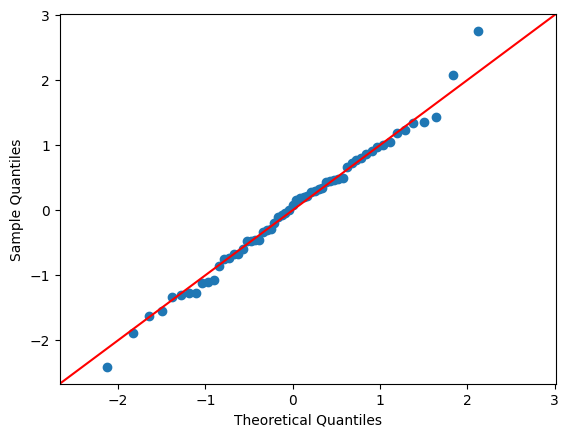

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming y_scaled is defined from the previous code
fig = sm.qqplot(y_scaled, line='45')
plt.show()

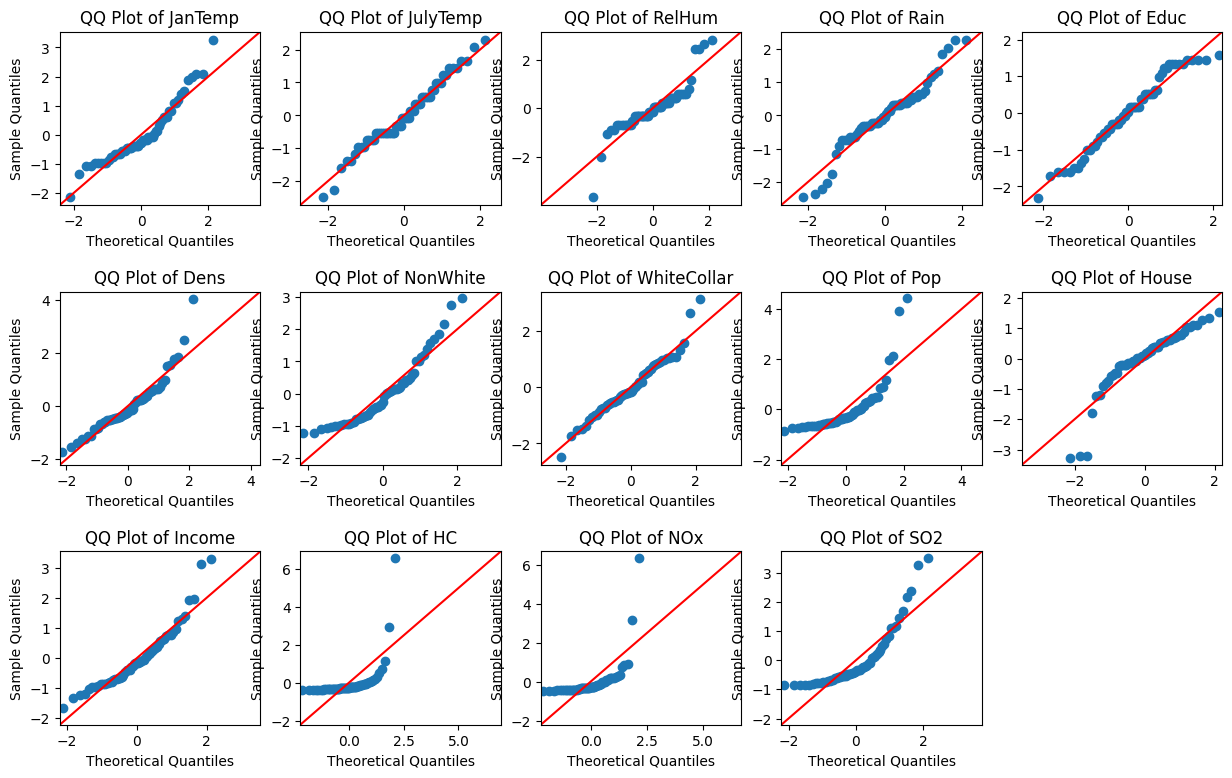

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming X_scaled is defined from the previous code
num_cols = 5  # Number of columns in the plot
num_rows = (X_scaled.shape[1] + num_cols - 1) // num_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
fig.subplots_adjust(hspace=0.5)

for i in range(1, X_scaled.shape[1]):
    row_idx = (i - 1) // num_cols
    col_idx = (i - 1) % num_cols
    ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx]
    sm.qqplot(X_scaled[:, i], line='45', ax=ax)
    ax.set_title(f"QQ Plot of {fields[i]}")

# Hide any unused subplots
for i in range(X_scaled.shape[1]-1, num_rows * num_cols):
    row_idx = i // num_cols
    col_idx = i % num_cols
    if num_rows > 1:
      axes[row_idx, col_idx].set_visible(False)
    else:
      axes[col_idx].set_visible(False)

plt.show()

In [ ]:
transform_indexes = [9,12,13]
[fields[i] for i in transform_indexes]

['Pop', 'HC', 'NOx']

In [ ]:
values_transformed = np.copy(values)
for index in transform_indexes:
    values_transformed[:, index] = np.log(values[:, index])
X_transformed = values_transformed[:,1:]
y_transformed = values_transformed[:,0]
X_transformed_scaled = (X_transformed - np.mean(X_transformed, axis=0)) / np.std(X_transformed, axis=0, ddof=1)
X_transformed_scaled = np.concatenate((np.ones_like(X_transformed[:,:1]), X_transformed_scaled), axis=1)
y_transformed_scaled = (y_transformed - np.mean(y_transformed)) / np.std(y_transformed, ddof=1)
#
#X_transformed_scaled = X_transformed
#X_transformed_scaled = np.concatenate((np.ones_like(X_transformed[:,:1]), X_transformed_scaled), axis=1)
#y_transformed_scaled = y_transformed
#
beta_transformed = np.linalg.inv(X_transformed_scaled.T @ X_transformed_scaled) @ X_transformed_scaled.T @ y_transformed_scaled
print("Optimal beta (transformed):", beta_transformed)
residuals_transformed = y_transformed_scaled - X_transformed_scaled @ beta_transformed
r2_transformed = r2_score(y_transformed_scaled, X_transformed_scaled @ beta_transformed)
print("R-squared (transformed):", r2_transformed)

Optimal beta (transformed): [-3.88578059e-16 -3.06613246e-01 -1.32214589e-01  4.58295567e-02
  2.62207006e-01 -1.03151607e-01  9.44138255e-02  7.22489424e-01
 -1.45842478e-01  3.70418214e-02 -1.01559113e-01 -4.20236439e-02
 -4.09265089e-01  5.30050650e-01  9.24280592e-02]
R-squared (transformed): 0.7702560148616224


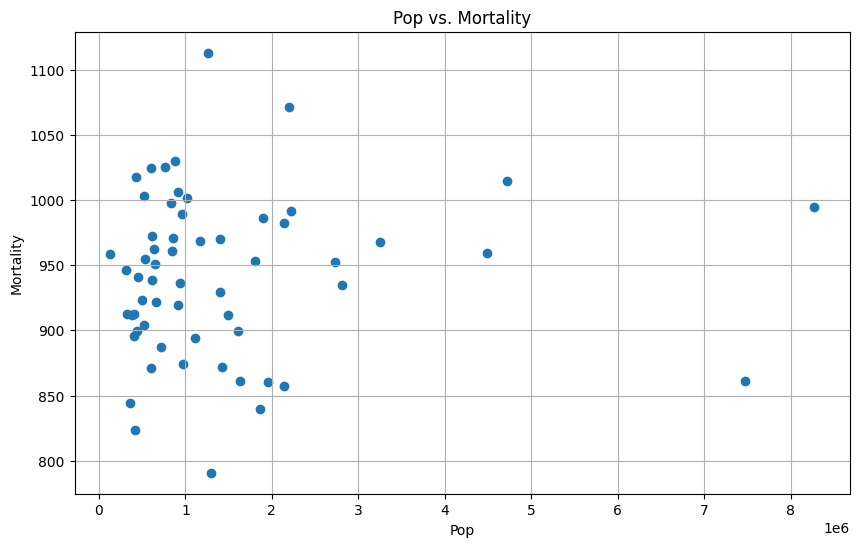

In [ ]:
# prompt: plot column 9 in values vs column 0 in values

import matplotlib.pyplot as plt
idx = 9
# Assuming 'values' and 'fields' are defined from the previous code
plt.figure(figsize=(10, 6))
plt.scatter(values[:, idx], values[:, 0])  # Column 0 vs Column 9
plt.ylabel(fields[0])
plt.xlabel(fields[idx])
plt.title(f"{fields[idx]} vs. {fields[0]}")
plt.grid(True)
plt.show()